# Velocity density distribution 

The three dimensional velocity function follows a Maxwell function
$$
f_{gal}(\textbf{v}) = \frac{1}{\sqrt{2 \sigma_{\nu}}} \exp \left(\frac{-|\textbf{v}|^2 } {2\sigma_{\nu}^2}\right)
$$

$$
f_{E}(v) =\frac{1}{\sqrt{2 \sigma_{\nu}}}v^2 \exp \left(\frac{-|v|^2 } {2\sigma_{\nu}^2}\right)
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import special

def pdf(v, sigma):
    return 1/ np.sqrt(2*np.pi*sigma) v**2 * np.exp(- np.abs(v)**2 / (2* sigma**2))

In [22]:
sigma = 270 # km/s

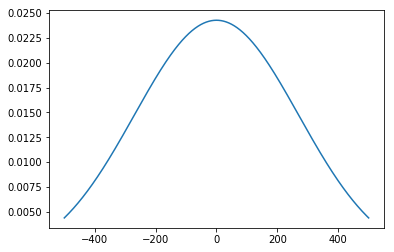

In [24]:
v_range = np.linspace(-500,500, 1000)
plt.plot(v_range, [pdf(v, sigma) for v in v_range])
plt.show()

# Form Factor

In [3]:
def FSquared(E_R, A):
    s=1
    R=1.2*math.sqrt(A)
    R1=math.sqrt(R**2-5*s**2)
    j_n=special.spherical_jn(1,E_R*R1)
    return (3*j_n/(E_R*R1))**2*math.exp(-E_R**2*s**2)

In [26]:
FSquared(5,130)

9.013513943239488e-21

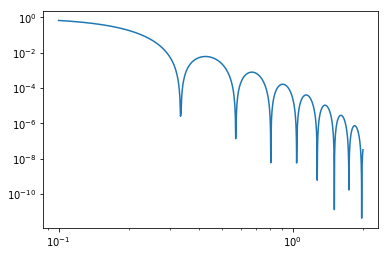

In [7]:
x=np.linspace(0.1,2,1000)
y=[FSquared(q,130) for q in x]

plt.loglog(x,y)
plt.show()

In [ ]:
m_N = A*1.660539E-27
2*m_N*A**2*f_p**2/(math.pi*v**2)*FSquared(q)